In [3]:
import pandas as pd
import glob
#import seaborn as sns

In [4]:
YEAR=2020

In [5]:
free_agents =pd.read_csv(f'datasets/{YEAR}/free_agents_salaries.csv')
stats = pd.read_csv(f'datasets/{YEAR}/stats.csv')
advanced_stats = pd.read_csv(f'datasets/{YEAR}/advanced_stats.csv')

In [8]:
salaries = pd.read_csv(f'datasets/{YEAR}/salaries.csv')

In [14]:
pd.set_option('display.max_colwidth', -1)

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [15]:
diccionario = pd.read_csv('datasets/diccionario_terminos.csv')
print(diccionario.to_latex(index=False))

\begin{tabular}{ll}
\toprule
             Variable &                                                                                                                                    Descripcion \\
\midrule
player & Nombre del jugador \\
salary & Salario \\
position & Posición en el campo de juego \\
age & Edad \\
g & Cantidad de Partidos \\
gs & Cantidad de partidos como titular \\
mp\_per\_g & Minutos por partido \\
fg\_per\_g & Tiros de campo (dobles y triples) por partido  \\
fga\_per\_g & Intentos de tiro de campo \\
fg\_pct & Porcentaje de tiros convertidos \\
fg3\_per\_g & Triples por partido \\
fg3a\_per\_g & Intentos de triples por partido \\
fg3\_pct & Porcentaje de triples convertidos \\
fg2\_per\_g & Dobles por partido \\
fg2a\_per\_g & Intentos de dobles por partido \\
fg2\_pct & Porcentaje de Dobles convertidos \\
efg\_pct & Porcentaje de tiros de campo efectiva \\
ft\_per\_g & Tiros libres por partido \\
fta\_per\_g & Intentos de tiro libre por partido \\
ft\_pct & Porc

In [11]:
salaries.head(7)

,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
0,Stephen Curry,GSW,40231758,43006362.0,45780966.0,NaN,NaN,NaN,Bird Rights,129019086
1,Chris Paul,OKC,38506482,41358814.0,44211146.0,NaN,NaN,NaN,NaN,124076442
2,Russell Westbrook,HOU,38178000,41006000.0,43848000.0,46662000.0,NaN,NaN,Bird Rights,123032000
3,John Wall,WAS,37800000,40824000.0,43848000.0,46872000.0,NaN,NaN,Bird Rights,122472000
4,James Harden,HOU,37800000,40824000.0,43848000.0,46872000.0,NaN,NaN,Bird Rights,122472000
5,LeBron James,LAL,37436858,39219565.0,41002273.0,NaN,NaN,NaN,NaN,76656423
6,Kevin Durant,BRK,37199000,39058950.0,40918900.0,42778850.0,NaN,NaN,NaN,117176850


In [6]:
# Algunos jugadores tienen un asterisco en su nombre
stats['player'] = stats.player.str.replace("\*", "")
advanced_stats['player'] = advanced_stats.player.str.replace("\*", "") 

/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/home/juan/anaconda3/envs/jmb_ds_projects/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
n_free_agents = free_agents.shape[0]

In [103]:
full_stats = pd.merge(stats,advanced_stats)

In [104]:
print(stats.shape[0])

651


In [105]:
print(full_stats.shape[0])

651


In [106]:
def consolidate_multiteam_players_stats(stats):
    traded_players = stats.groupby('player').agg(n = ('team_id','nunique'))\
                          .reset_index().query('n > 1').player.to_list()
    stats = stats[(~stats.player.isin(traded_players))|((stats.player.isin(traded_players))
                                                        &(stats.team_id=='TOT'))]
    return stats

In [107]:
full_stats = consolidate_multiteam_players_stats(full_stats)

In [108]:
free_agents_stats = pd.merge(free_agents, full_stats, how='left')

In [109]:
n_free_agents_stats = sum(~free_agents_stats.team_id.isna())

In [110]:
print(f"There are {n_free_agents} free agents")
print(f"There are {n_free_agents_stats} free agents with stats")

There are 120 free agents
There are 119 free agents with stats


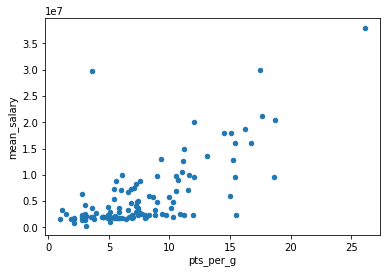

In [111]:
free_agents_stats.plot.scatter(x='pts_per_g', y='mean_salary')

In [112]:
free_agents_stats.to_csv(f'datasets/{YEAR}/' + 'free_agents_salaries_with_stats.csv', index=False)

In [16]:
ls = glob.glob('datasets/*/free_agents_salaries_with_stats.csv')

In [18]:
a = pd.concat([pd.read_csv(i) for i in ls]) 

In [19]:
a

,player,mean_salary,full_contract,first_year_salary,free_agency_year,position,age,team_id,g,gs,...,ws-dum,ows,dws,ws,ws_per_48,bpm-dum,obpm,dbpm,bpm,vorp
0,Lavoy Allen,3000000.0,6000000.0,3000000.0,2012,PF,22.0,PHI,41.0,15.0,...,NaN,0.4,1.2,1.6,0.124,NaN,-2.8,1.0,-1.7,0.0
1,Ray Allen,3159525.0,6319050.0,3090000.0,2012,SG,36.0,BOS,46.0,42.0,...,NaN,2.5,2.2,4.7,0.145,NaN,1.5,0.7,2.2,1.6
2,Louis Amundson,1069509.0,1069509.0,1069509.0,2012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alan Anderson,885120.0,885120.0,885120.0,2012,SF,29.0,TOR,17.0,12.0,...,NaN,0.1,0.2,0.3,0.032,NaN,-1.7,-1.3,-3.0,-0.1
4,Ryan Anderson,8500000.0,34000000.0,8700000.0,2012,PF,23.0,ORL,61.0,61.0,...,NaN,7.0,1.9,8.9,0.219,NaN,5.2,-1.1,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Josh Smith,5400000.0,21600000.0,5400000.0,2016,PF,30.0,TOT,55.0,7.0,...,NaN,-1.2,1.2,0.0,0.000,NaN,-3.5,0.4,-3.1,-0.2
128,Lou Amundson,1551659.0,1551659.0,1551659.0,2016,PF,33.0,NYK,29.0,0.0,...,NaN,-0.3,0.2,-0.1,-0.014,NaN,-6.7,-0.2,-6.9,-0.3
129,Marcelo Huertas,1533750.0,3067500.0,1500000.0,2016,PG,32.0,LAL,53.0,0.0,...,NaN,-0.2,0.1,-0.1,-0.006,NaN,-2.7,-2.2,-5.0,-0.7
130,Phil Pressey,35000.0,35000.0,35000.0,2016,PG,24.0,TOT,23.0,0.0,...,NaN,-0.4,0.3,-0.1,-0.017,NaN,-3.3,0.1,-3.2,-0.1
